# Loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/charumathi/Desktop/Sem-6/ML-lab/A5/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Visualization

<Axes: xlabel='Month'>

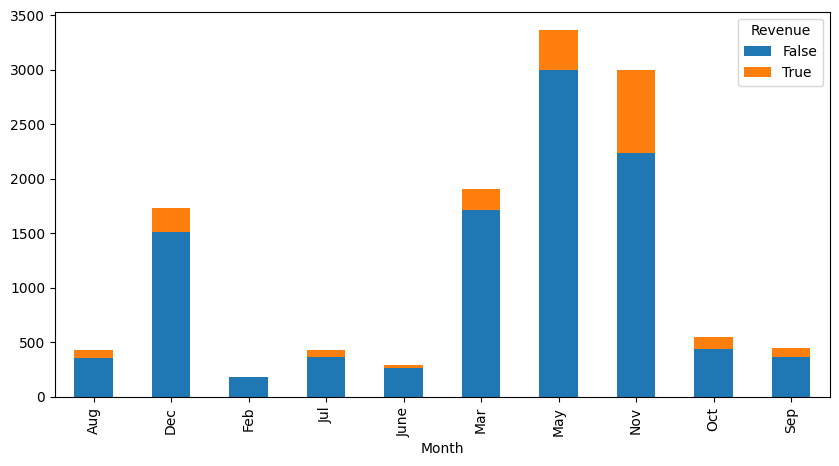

In [3]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

<Axes: xlabel='Weekend'>

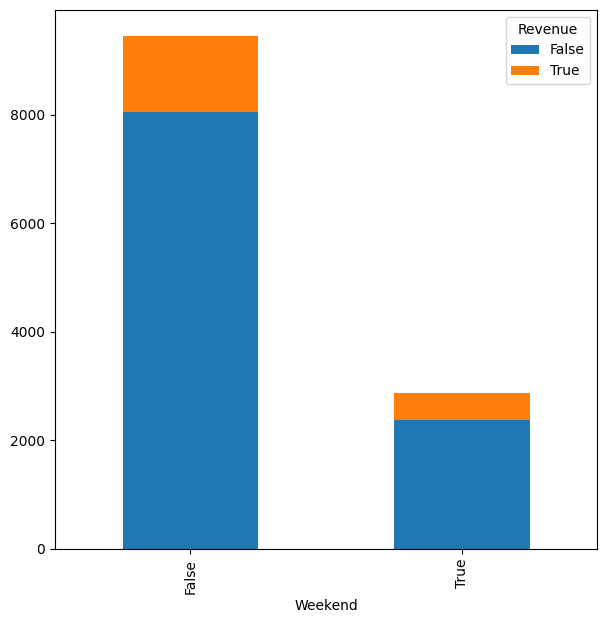

In [4]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<Axes: ylabel='VisitorType'>

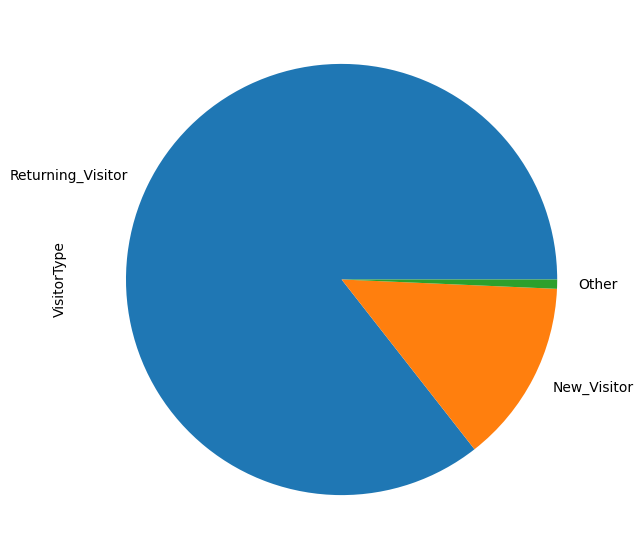

In [5]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<Axes: >

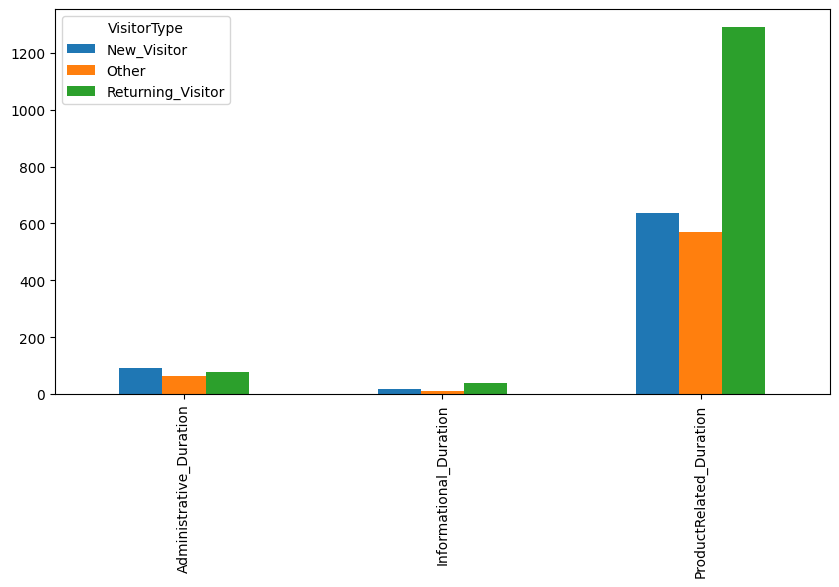

In [6]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

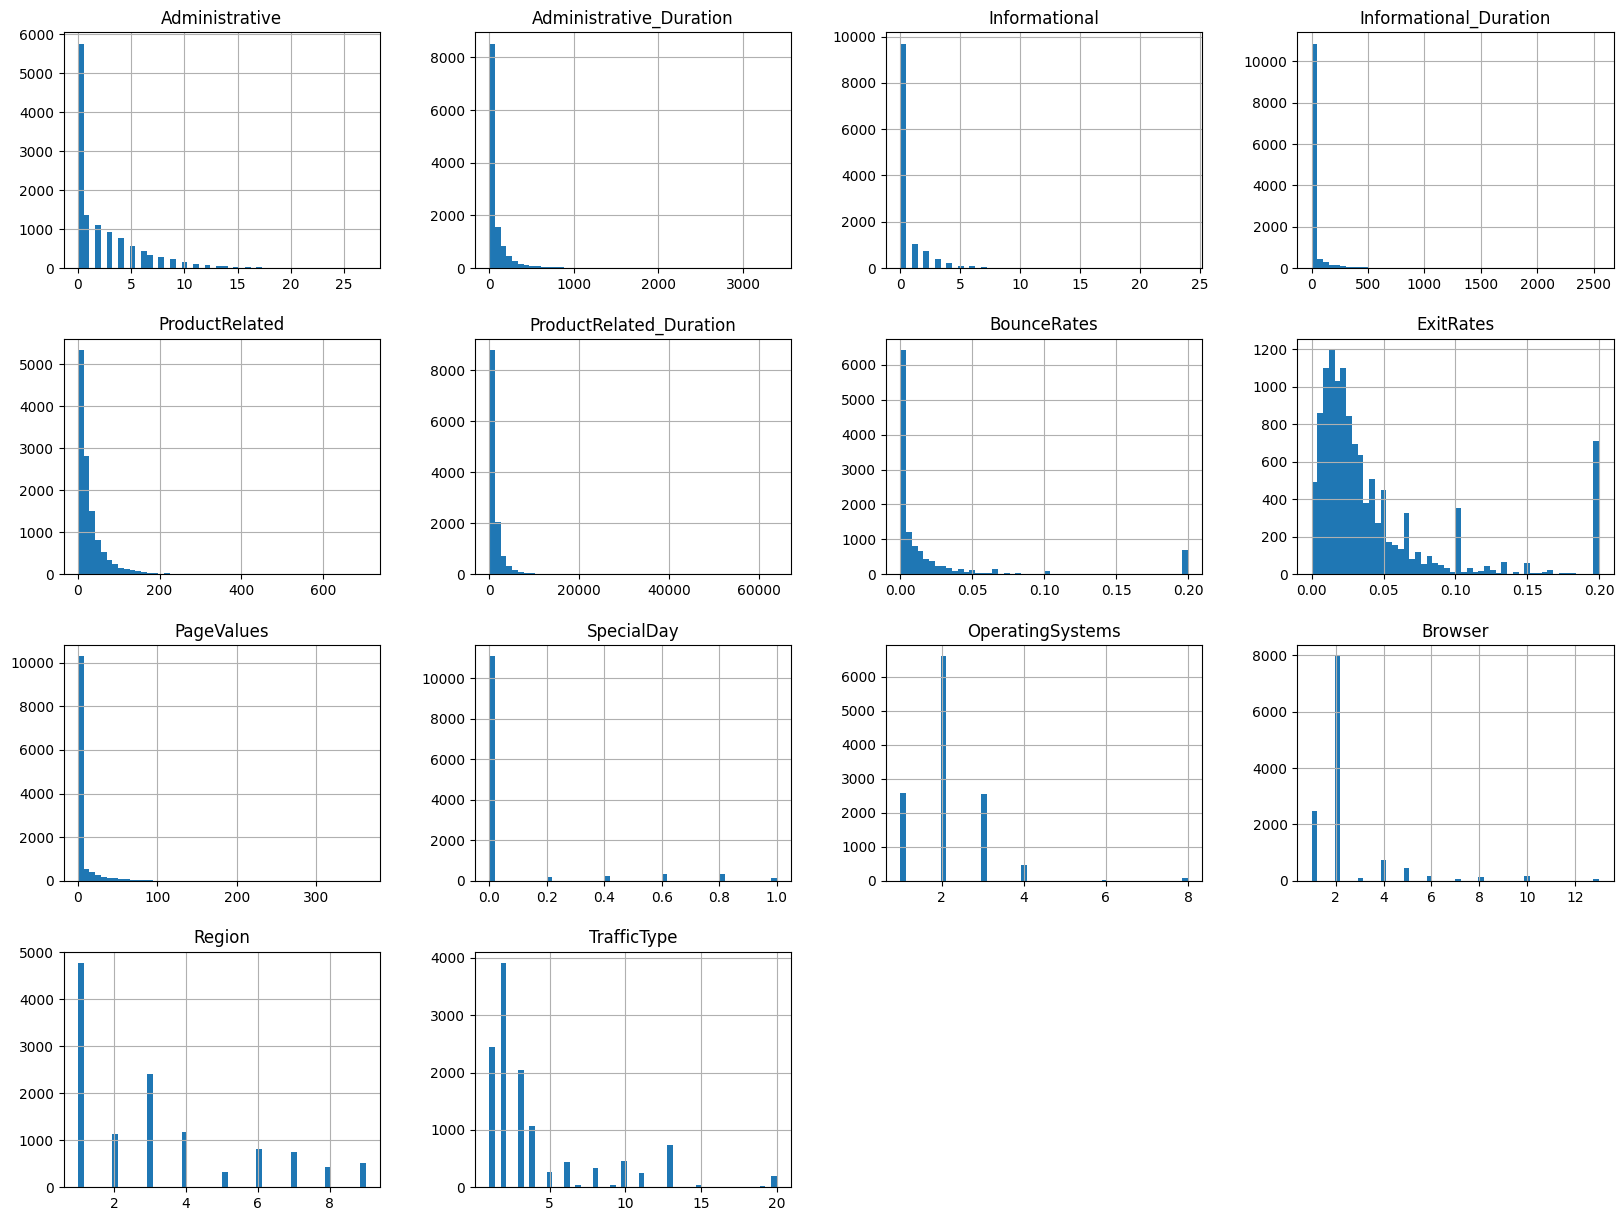

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Data Cleaning and Standardization

In [8]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<Axes: >

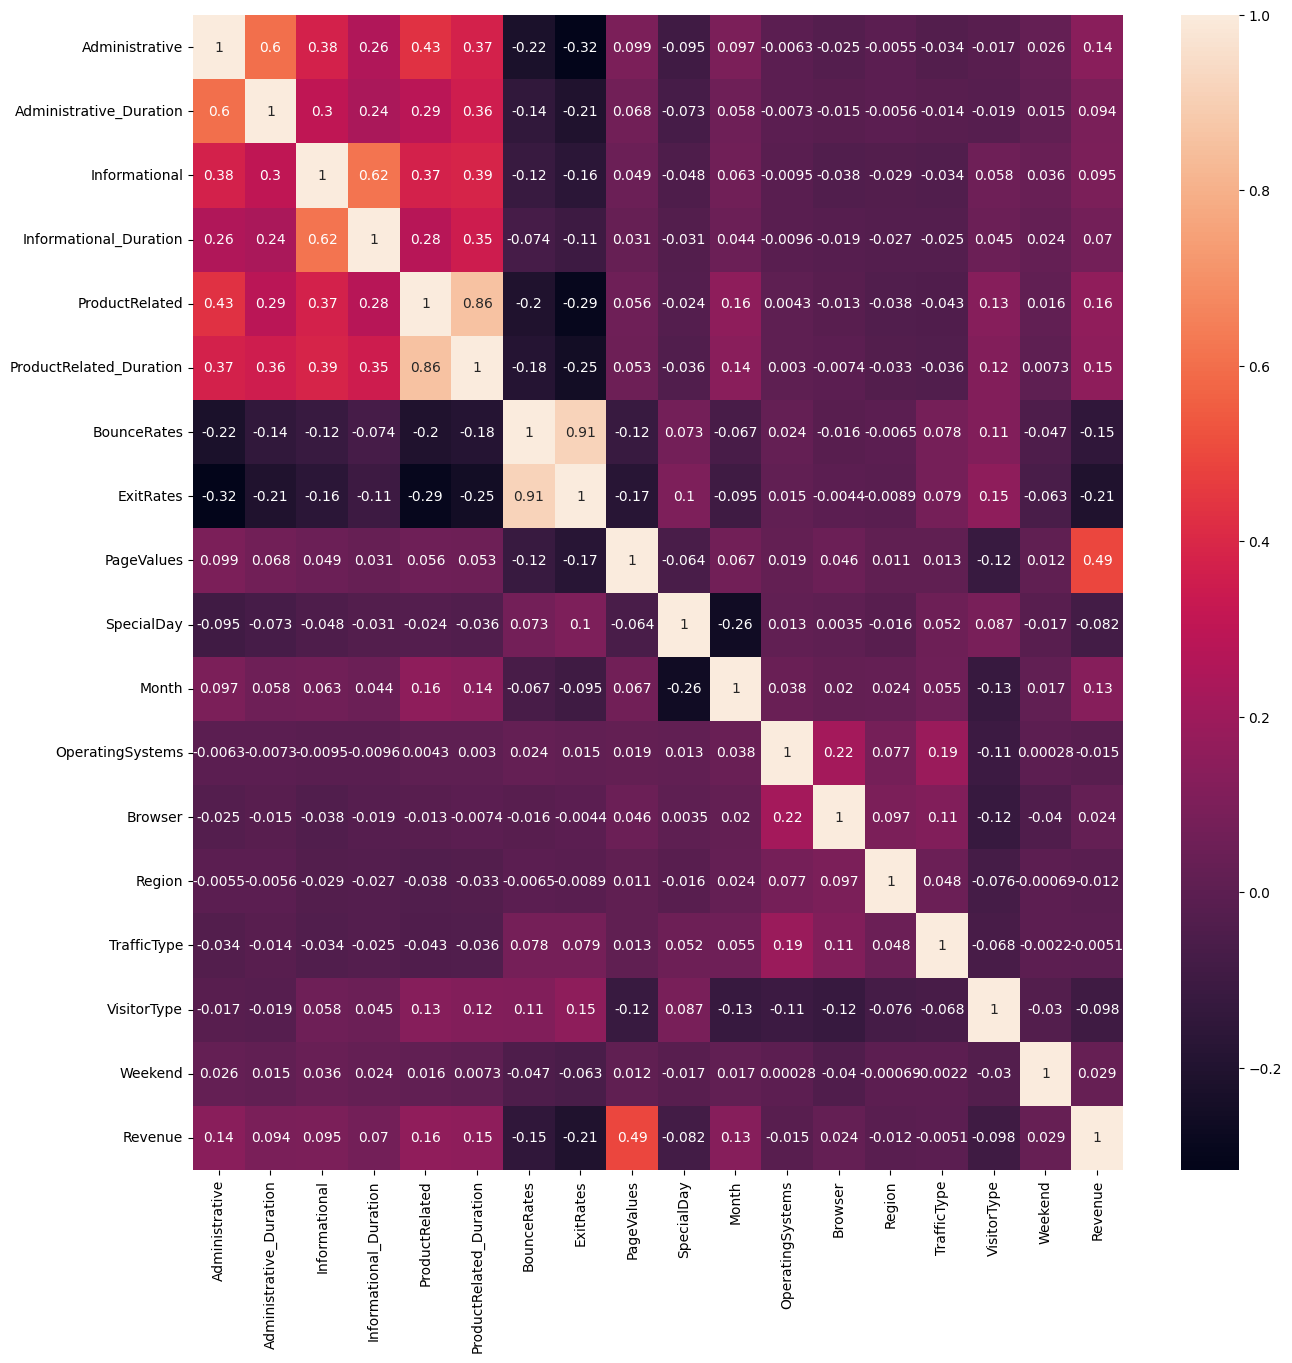

In [9]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [10]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(df.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(df.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


# K Nearest Neighbor

## Euclidean distance

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3134
           1       0.71      0.29      0.41       565

    accuracy                           0.87      3699
   macro avg       0.80      0.63      0.67      3699
weighted avg       0.86      0.87      0.85      3699

Accuracy :  0.8732089753987564
[[3066   68]
 [ 401  164]]


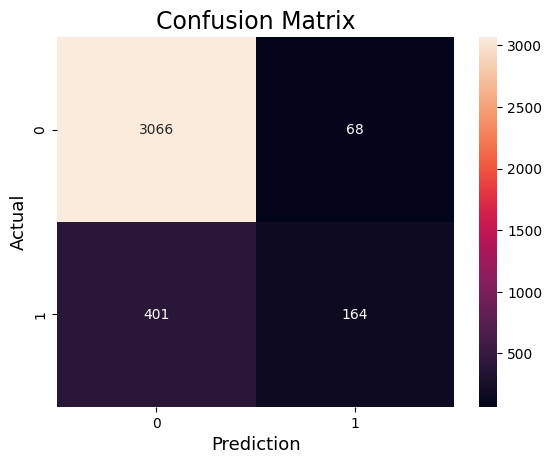

[[0.82887267 0.01838335]
 [0.10840768 0.04433631]]


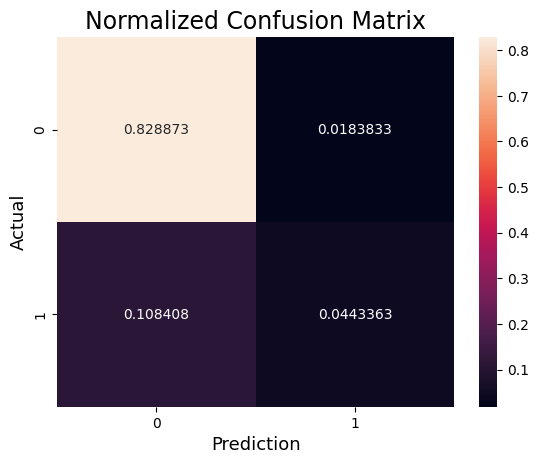

In [48]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn_euclid = KNeighborsClassifier(n_neighbors = 17,p=2) 
  
knn_euclid.fit(X_train, y_train) 
pred_euclid = knn_euclid.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix 
cm_euclid = confusion_matrix(y_test,pred_euclid)
print(classification_report(y_test, pred_euclid)) 
from sklearn.metrics import accuracy_score
acc_euclid = accuracy_score(y_test, pred_euclid)
print("Accuracy : ",acc_euclid)
print(cm_euclid)
sns.heatmap(cm_euclid, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_euclid = confusion_matrix(y_test,pred_euclid,normalize='all')
print(cmn_euclid)
sns.heatmap(cmn_euclid, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

## Manhattan distance

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3124
           1       0.77      0.27      0.40       575

    accuracy                           0.87      3699
   macro avg       0.83      0.63      0.66      3699
weighted avg       0.86      0.87      0.85      3699

Accuracy :  0.8737496620708299
[[3079   45]
 [ 422  153]]


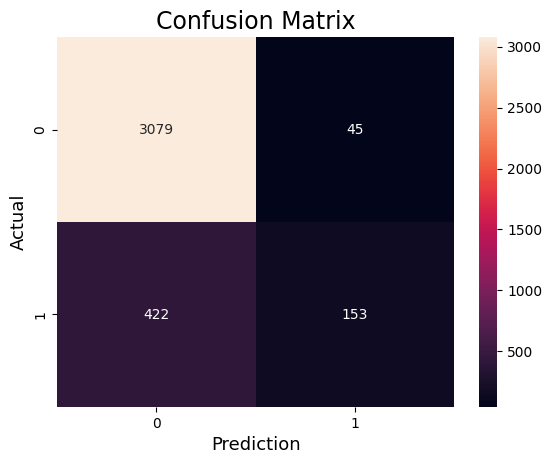

[[0.83238713 0.01216545]
 [0.11408489 0.04136253]]


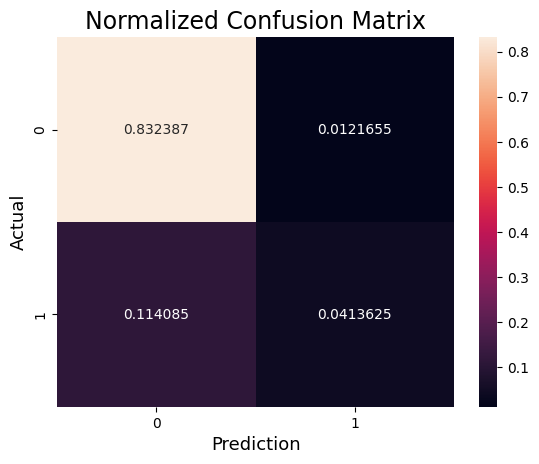

In [47]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn_manhattan = KNeighborsClassifier(n_neighbors = 17,p=1) 
  
knn_manhattan.fit(X_train, y_train) 
pred_manhattan = knn_manhattan.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix 
cm_manhattan = confusion_matrix(y_test,pred_manhattan)
print(classification_report(y_test, pred_manhattan)) 
from sklearn.metrics import accuracy_score
acc_manhattan = accuracy_score(y_test, pred_manhattan)
print("Accuracy : ",acc_manhattan)
print(cm_manhattan)
sns.heatmap(cm_manhattan, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_manhattan = confusion_matrix(y_test,pred_manhattan,normalize='all')
print(cmn_manhattan)
sns.heatmap(cmn_manhattan, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

## Minkowski distance

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3136
           1       0.73      0.34      0.47       563

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699

Accuracy :  0.8807785888077859
[[3066   70]
 [ 371  192]]


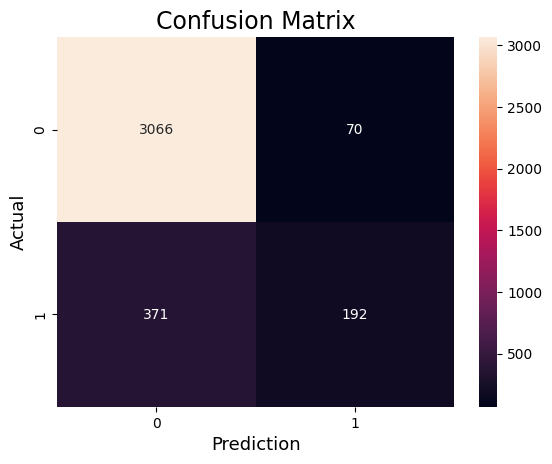

[[0.82887267 0.01892403]
 [0.10029738 0.05190592]]


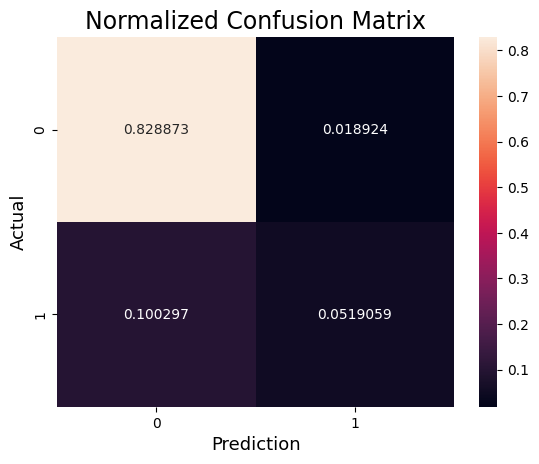

In [46]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn_minkowski = KNeighborsClassifier(n_neighbors = 17,p=3) 
  
knn_minkowski.fit(X_train, y_train) 
pred_minkowski = knn_minkowski.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix 
cm_minkowski = confusion_matrix(y_test,pred_minkowski)
print(classification_report(y_test, pred_minkowski)) 
from sklearn.metrics import accuracy_score
acc_minkowski = accuracy_score(y_test, pred_minkowski)
print("Accuracy : ",acc_minkowski)
print(cm_minkowski)
sns.heatmap(cm_minkowski, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cmn_minkowski = confusion_matrix(y_test,pred_minkowski,normalize='all')
print(cmn_minkowski)
sns.heatmap(cmn_minkowski, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Normalized Confusion Matrix',fontsize=17)
plt.show()

## ROC curve

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.887


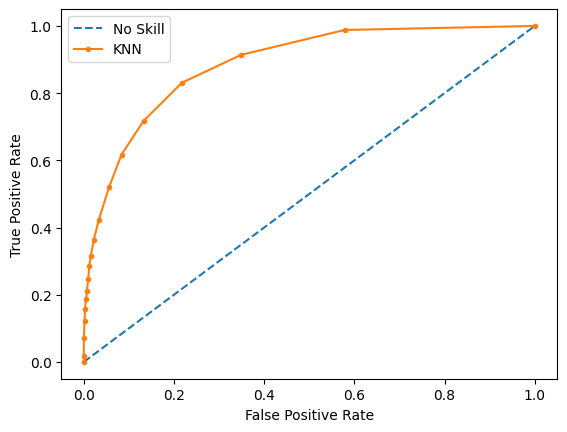

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Results and Inference

In [53]:
func = ['Euclidean','Manhattan','Minkowski']
cms = [cm_euclid,cm_manhattan,cm_minkowski]
cmns = [cmn_euclid,cmn_manhattan,cmn_minkowski]
t = [acc_euclid,acc_manhattan,acc_minkowski]
x = func
y = cms
z = cmns
res = pd.DataFrame({"Distance Function": x, "Accuracy": t,"Confusion Matrix": y})
print(res)

  Distance Function  Accuracy          Confusion Matrix
0         Euclidean  0.873209  [[3066, 68], [401, 164]]
1         Manhattan  0.873750  [[3079, 45], [422, 153]]
2         Minkowski  0.880779  [[3066, 70], [371, 192]]
